# Neural Network Model and learning

In [9]:
import numpy as np

# load train datasets
train_X=np.load('train_X.npy')
train_Y=np.load('train_Y.npy')

#  load test dataset
test_X=np.load('test_X.npy')
test_Y=np.load('test_Y.npy')

## Visualizing the dataset

In [10]:
print(train_X.shape)

(10000, 150, 150, 1)


In [11]:
train_Y.shape

(10000, 2)

In [12]:
test_X.shape

(992, 150, 150, 1)

In [13]:
test_Y.shape

(992, 2)

## Neural Network Modelling & Learning

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

# using keras creating a neural networks model
model=Sequential()

In [15]:
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(200,(3,3),input_shape=train_X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Flatten())
model.add(Dropout(0.5))

In [18]:
#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

In [19]:
# Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
# creating model checkpoint: Callback to save the Keras model or model weights at some frequency.
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [23]:
history=model.fit(train_X,train_Y,callbacks=[checkpoint],epochs=10, validation_split=0.3,shuffle=True)

Epoch 1/10
219/219 [==============================] - ETA: 0s - loss: 0.2980 - accuracy: 0.8754WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
219/219 [==============================] - 759s 3s/step - loss: 0.2980 - accuracy: 0.8754 - val_loss: 0.1852 - val_accuracy: 0.9340
Epoch 2/10
219/219 [==============================] - 740s 3s/step - loss: 0.1176 - accuracy: 0.9570 - val_loss: 0.1230 - val_accuracy: 0.9620
Epoch 3/10
219/219 [==============================] - 736s 3s/step - loss: 0.0865 - accuracy: 0.

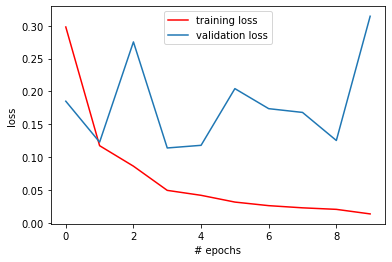

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

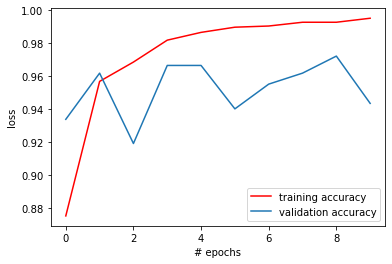

In [30]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Evaluating on test Dataset

In [28]:
print(model.evaluate(test_X,test_Y))

31/31 [==============================] - 20s 654ms/step - loss: 0.1458 - accuracy: 0.9688
[0.145834818482399, 0.96875]


## Accuracy on test dataset is <span>96.88%</span>

<h1><center> -----Thank-you-----</center></h1>